In [39]:
from keras.layers.merge import concatenate
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from keras import initializers
from keras import backend as K
from sklearn.linear_model import SGDClassifier as sgd
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from tqdm import tqdm
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalAveragePooling1D,Concatenate,Lambda,Input,GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D,TimeDistributed
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.metrics import log_loss
from nltk import word_tokenize
import sys
import glob
import errno
import pandas as pd
import numpy as np
import mpld3
mpld3.enable_notebook()
from collections import Counter
import os
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
%matplotlib inline

  2%|▏         | 953/54879 [01:39<1:33:24,  9.62it/s]


In [20]:
X_train = pd.read_csv('./my_train.csv', encoding = 'utf-8')
X_test = pd.read_csv('./my_test.csv', encoding = 'utf-8')

In [53]:
X_train = X_train.drop(['len'], axis = 1)
X_train

,Unnamed: 0,index,text,author,words,punc_1,punc_2,punc_3,punc_4,punc_5,...,cnn_0,cnn_1,cnn_2,cnn_3,cnn_4,cnn_glove_0,cnn_glove_1,cnn_glove_2,cnn_glove_3,cnn_glove_4
0,0,0,"He was almost choking. There was so much, so m...",3,"['he', 'was', 'almost', 'choking', 'there', 'w...",2.173913,15.217391,0.000000,0.000000,0.0,...,0.000004,5.030749e-07,6.363115e-07,9.999890e-01,5.973721e-06,0.228246,0.091211,0.238018,0.292282,0.150244
1,1,1,"“Your sister asked for it, I suppose?”",2,"['your', 'sister', 'asked', 'for', 'it', 'i', ...",0.000000,14.285714,14.285714,0.000000,0.0,...,0.127512,1.281797e-01,3.045658e-01,3.041949e-01,1.355474e-01,0.256178,0.209694,0.179051,0.244509,0.110568
2,2,2,"She was engaged one day as she walked, in per...",1,"['she', 'was', 'engaged', 'one', 'day', 'as', ...",1.754386,14.035088,0.000000,0.000000,0.0,...,0.000048,9.999517e-01,9.179124e-11,5.279585e-09,3.518488e-11,0.275734,0.204445,0.163386,0.248954,0.107481
3,3,3,"The captain was in the porch, keeping himself ...",4,"['the', 'captain', 'was', 'in', 'the', 'porch'...",3.448276,25.862069,0.000000,1.724138,0.0,...,0.022829,7.759529e-05,1.250570e-02,6.096245e-06,9.645818e-01,0.277257,0.068337,0.309244,0.114432,0.230730
4,4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,"['have', 'mercy', 'gentlemen', 'odin', 'flung'...",2.564103,17.948718,0.000000,0.000000,0.0,...,0.001173,5.007124e-04,1.033069e-03,9.972453e-01,4.776810e-05,0.214960,0.095530,0.191988,0.371438,0.126084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54874,54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2,"['is', 'that', 'you', 'mr', 'smith', 'odin', '...",0.000000,26.666667,6.666667,0.000000,0.0,...,0.158780,4.896154e-01,1.745848e-01,1.489622e-01,2.805740e-02,0.287775,0.221648,0.170904,0.199745,0.119928
54875,54875,54875,"I told my plan to the captain, and between us ...",4,"['i', 'told', 'my', 'plan', 'to', 'the', 'capt...",0.000000,11.111111,0.000000,0.000000,0.0,...,0.091663,1.065843e-01,2.777643e-01,4.209229e-01,1.030658e-01,0.300218,0.091734,0.304851,0.097075,0.206123
54876,54876,54876,"""Your sincere well-wisher, friend, and sister...",1,"['your', 'sincere', 'well', 'wisher', 'friend'...",0.000000,50.000000,0.000000,0.000000,25.0,...,0.096368,6.565409e-01,2.172582e-02,2.219489e-01,3.415796e-03,0.282010,0.294450,0.135550,0.195103,0.092887
54877,54877,54877,“Then you wanted me to lend you money?”,3,"['then', 'you', 'wanted', 'me', 'to', 'lend', ...",0.000000,0.000000,12.500000,0.000000,0.0,...,0.057121,3.891894e-02,1.221806e-01,7.510995e-01,3.067999e-02,0.198492,0.083136,0.185763,0.410427,0.122182


In [21]:
#종속변수를 수치화
Y_train = LabelEncoder().fit_transform(X_train['author'])
Y_train

array([3, 2, 1, ..., 1, 3, 0])

# Stack Features

In [23]:
# Multinomial Naive Bayes(MNB)
# Word base, Character base인 TFIDF와 Counts를 통해 feature를 생성

def MNB(train_X, train_y, test_X, test_y, test_X2):
    model = naive_bayes.MultinomialNB()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

def TFIDF_MNB(X_train,X_test,Y_train):
    #ngram = 2
    #최대 2개로 묶는 것이 제일 적은 loss를 보여줌. (정우)
    tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    full_tfidf = tfidf_vec.fit_transform(X_train['text'].values.tolist() + X_test['text'].values.tolist())
    train_tfidf = tfidf_vec.transform(X_train['text'].values.tolist())
    test_tfidf = tfidf_vec.transform(X_test['text'].values.tolist())

    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([X_train.shape[0], 5])
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    #아까 말한 kfold 8번 & random_state 2020 밑에도 다 봐바(정우)
    for trn_index, tst_index in kf.split(X_train):
        trn_X, tst_X = train_tfidf[trn_index], train_tfidf[tst_index]
        trn_y, tst_y = Y_train[trn_index], Y_train[tst_index]
        pred_val_y, pred_test_y, model = MNB(trn_X, trn_y, tst_X, tst_y, test_tfidf)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(tst_y, pred_val_y))
    print("Mean cv score : ", np.mean(cv_scores))
    pred_full_test = pred_full_test / 8.
    return pred_train,pred_full_test

In [18]:
pred_train,pred_test = TFIDF_MNB(X_train,X_test,Y_train)

X_train["tfidf_words_nb_cvec_0"] = pred_train[:,0]
X_train["tfidf_words_nb_cvec_1"] = pred_train[:,1]
X_train["tfidf_words_nb_cvec_2"] = pred_train[:,2]
X_train["tfidf_words_nb_cvec_3"] = pred_train[:,3]
X_train["tfidf_words_nb_cvec_4"] = pred_train[:,4]
X_test["tfidf_words_nb_cvec_0"] = pred_test[:,0]
X_test["tfidf_words_nb_cvec_1"] = pred_test[:,1]
X_test["tfidf_words_nb_cvec_2"] = pred_test[:,2]
X_test["tfidf_words_nb_cvec_3"] = pred_test[:,3]
X_test["tfidf_words_nb_cvec_4"] = pred_test[:,4]

Mean cv score :  1.1046639894071204


In [30]:
# Char을 기준으로 한번 더.

def TFIDF_MNB(X_train,X_test,Y_train):
    tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2),analyzer='char')
    full_tfidf = tfidf_vec.fit_transform(X_train['text'].values.tolist() + X_test['text'].values.tolist())
    train_tfidf = tfidf_vec.transform(X_train['text'].values.tolist())
    test_tfidf = tfidf_vec.transform(X_test['text'].values.tolist())

    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([X_train.shape[0], 5])
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    for trn_index, tst_index in kf.split(X_train):
        trn_X, tst_X = train_tfidf[trn_index], train_tfidf[tst_index]
        trn_y, tst_y = Y_train[trn_index], Y_train[tst_index]
        pred_val_y, pred_test_y, model = MNB(trn_X, trn_y, tst_X, tst_y, test_tfidf)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(tst_y, pred_val_y))
    print("Mean cv score : ", np.mean(cv_scores))
    pred_full_test = pred_full_test / 8.
    return pred_train,pred_full_test

pred_train,pred_test = TFIDF_MNB(X_train,X_test,Y_train)

X_train["tfidf_chars_nb_cvec_0"] = pred_train[:,0]
X_train["tfidf_chars_nb_cvec_1"] = pred_train[:,1]
X_train["tfidf_chars_nb_cvec_2"] = pred_train[:,2]
X_train["tfidf_chars_nb_cvec_3"] = pred_train[:,3]
X_train["tfidf_chars_nb_cvec_4"] = pred_train[:,4]
X_test["tfidf_chars_nb_cvec_0"] = pred_test[:,0]
X_test["tfidf_chars_nb_cvec_1"] = pred_test[:,1]
X_test["tfidf_chars_nb_cvec_2"] = pred_test[:,2]
X_test["tfidf_chars_nb_cvec_3"] = pred_test[:,3]
X_test["tfidf_chars_nb_cvec_4"] = pred_test[:,4]

Mean cv score :  1.2982781857670176


In [31]:
def counts_MNB(X_train,X_test,Y_train):
    count_vec = CountVectorizer(stop_words='english', ngram_range=(1,2))
    count_vec.fit(X_train['text'].values.tolist() + X_test['text'].values.tolist())
    train_count = count_vec.transform(X_train['text'].values.tolist())
    test_count = count_vec.transform(X_test['text'].values.tolist())
    
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([X_train.shape[0], 5])
    kf = model_selection.KFold(n_splits = 8, shuffle=True, random_state=2020)
    for trn_index, tst_index in kf.split(X_train):
        trn_X, tst_X = train_count[trn_index], train_count[tst_index]
        trn_y, tst_y = Y_train[trn_index], Y_train[tst_index]
        pred_val_y, pred_test_y, model = MNB(trn_X, trn_y, tst_X, tst_y, test_count)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(tst_y, pred_val_y))
    print("Mean cv score : ", np.mean(cv_scores))
    pred_full_test = pred_full_test / 8.
    return pred_train,pred_full_test

pred_train,pred_test = counts_MNB(X_train,X_test,Y_train)

X_train["count_words_nb_cvec_0"] = pred_train[:,0]
X_train["count_words_nb_cvec_1"] = pred_train[:,1]
X_train["count_words_nb_cvec_2"] = pred_train[:,2]
X_train["count_words_nb_cvec_3"] = pred_train[:,3]
X_train["count_words_nb_cvec_4"] = pred_train[:,4]
X_test["count_words_nb_cvec_0"] = pred_test[:,0]
X_test["count_words_nb_cvec_1"] = pred_test[:,1]
X_test["count_words_nb_cvec_2"] = pred_test[:,2]
X_test["count_words_nb_cvec_3"] = pred_test[:,3]
X_test["count_words_nb_cvec_4"] = pred_test[:,4]


Mean cv score :  1.1222420874345764


## Sentence Vectors

In [32]:
def counts_MNB(X_train,X_test,Y_train):
    count_vec = CountVectorizer(ngram_range=(1,2),analyzer='char')
    count_vec.fit(X_train['text'].values.tolist() + X_test['text'].values.tolist())
    train_count = count_vec.transform(X_train['text'].values.tolist())
    test_count = count_vec.transform(X_test['text'].values.tolist())
    
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([X_train.shape[0], 5])
    kf = model_selection.KFold(n_splits = 8, shuffle=True, random_state=2020)
    for trn_index, tst_index in kf.split(X_train):
        trn_X, tst_X = train_count[trn_index], train_count[tst_index]
        trn_y, tst_y = Y_train[trn_index], Y_train[tst_index]
        pred_val_y, pred_test_y, model = MNB(trn_X, trn_y, tst_X, tst_y, test_count)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(tst_y, pred_val_y))
    print("Mean cv score : ", np.mean(cv_scores))
    pred_full_test = pred_full_test / 8.
    return pred_train,pred_full_test

pred_train,pred_test = counts_MNB(X_train,X_test,Y_train)

X_train["count_chars_nb_cvec_0"] = pred_train[:,0]
X_train["count_chars_nb_cvec_1"] = pred_train[:,1]
X_train["count_chars_nb_cvec_2"] = pred_train[:,2]
X_train["count_chars_nb_cvec_3"] = pred_train[:,3]
X_train["count_chars_nb_cvec_4"] = pred_train[:,4]
X_test["count_chars_nb_cvec_0"] = pred_test[:,0]
X_test["count_chars_nb_cvec_1"] = pred_test[:,1]
X_test["count_chars_nb_cvec_2"] = pred_test[:,2]
X_test["count_chars_nb_cvec_3"] = pred_test[:,3]
X_test["count_chars_nb_cvec_4"] = pred_test[:,4]

Mean cv score :  2.3989175677092884


In [40]:
#Sent2vec을 통해 Glove 임베딩을 통한 전체문장을 normalized된 벡터로 표현
#tqdm 함수를 통해 진행상황 출력

def sent2vec(embeddings_index,s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stopwords.words('english')]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(100)
    return v / np.sqrt((v ** 2).sum())

def Glove(x_train,x_test):
    embeddings_index = {}
    f = open("./glove.6B/glove.6B.100d.txt")
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    print('Imbedding Index : %s' % len(embeddings_index))

    # Sent2Vec
    xtrain_glove = [sent2vec(embeddings_index,x) for x in tqdm(x_train)]
    xtest_glove = [sent2vec(embeddings_index,x) for x in tqdm(x_test)]
    xtrain_glove = np.array(xtrain_glove)
    xtest_glove = np.array(xtest_glove)
    return xtrain_glove,xtest_glove,embeddings_index

glove_vecs_train,glove_vecs_test,embeddings_index = Glove(X_train['text'],X_test['text'])
#벡터화 된 문장을 100개의 피처로 저장
X_train[['sent_vec_'+str(i) for i in range(100)]] = pd.DataFrame(glove_vecs_train.tolist())
X_test[['sent_vec_'+str(i) for i in range(100)]] = pd.DataFrame(glove_vecs_test.tolist())

  0%|          | 19/54879 [00:00<05:03, 180.57it/s]

Imbedding Index : 400000


100%|██████████| 19617/19617 [03:56<00:00, 82.98it/s] 


## Neural Network and Fasttext

In [44]:
#과적합 현상(val_loss의 증가)이 쉽게 발생하여 patience를 0으로 설정.
earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

# Keras의 Text to Sequence이용하여 CNN모델 사용
# 차원을 줄이는 것이 더 적은 overfitting 발생
def initCNN(nb_words_cnt,max_len):
    model = Sequential()
    model.add(Embedding(nb_words_cnt,32,input_length=max_len))
    model.add(Dropout(0.5))
    model.add(Conv1D(16, 5, padding='valid', activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

def CNN(X_train,X_test,Y_train):
    max_len = 70
    nb_words = 10000
    
    print('Processing text dataset')
    texts_1 = []
    for text in X_train['text']:
        texts_1.append(text)

    print('train : %s texts' % len(texts_1))
    test_texts_1 = []
    for text in X_test['text']:
        test_texts_1.append(text)
    print('test : %s texts' % len(test_texts_1))
    
    tokenizer = Tokenizer(num_words=nb_words)
    tokenizer.fit_on_texts(texts_1 + test_texts_1)
    sequences_1 = tokenizer.texts_to_sequences(texts_1)
    word_index = tokenizer.word_index
    print('unique tokens : %s ' % len(word_index))

    test_sequences_1 = tokenizer.texts_to_sequences(test_texts_1)

    xtrain_pad = pad_sequences(sequences_1, maxlen=max_len)
    xtest_pad = pad_sequences(test_sequences_1, maxlen=max_len)
    del test_sequences_1
    del sequences_1
    nb_words_cnt = min(nb_words, len(word_index)) + 1

    #원핫인코딩
    ytrain_enc = np_utils.to_categorical(Y_train)
    
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([xtrain_pad.shape[0], 5])
    for trn_index, tst_index in kf.split(xtrain_pad):
        trn_X, tst_X = xtrain_pad[trn_index], xtrain_pad[tst_index]
        trn_y, tst_y = ytrain_enc[trn_index], ytrain_enc[tst_index]
        model = initCNN(nb_words_cnt,max_len)
        model.fit(trn_X, y = trn_y, batch_size=16, epochs=12, verbose=1,validation_data=(tst_X, tst_y),callbacks=[earlyStopping])
        pred_val_y = model.predict(tst_X)
        pred_test_y = model.predict(xtest_pad)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y

    pred_test = pred_full_test/8
        
    X_train["cnn_0"] = pred_train[:,0]
    X_train["cnn_1"] = pred_train[:,1]
    X_train["cnn_2"] = pred_train[:,2]
    X_train["cnn_3"] = pred_train[:,3]
    X_train["cnn_4"] = pred_train[:,4] 
    
    X_test["cnn_0"] = pred_test[:,0]
    X_test["cnn_1"] = pred_test[:,1]
    X_test["cnn_2"] = pred_test[:,2]
    X_test["cnn_3"] = pred_test[:,3]
    X_test["cnn_4"] = pred_test[:,4]
    
    return X_train, X_test

In [49]:
# Glove Feature를 이용한 간단한 신경망모델

def initRNN_glove():
    model = Sequential()

    model.add(Dense(16, input_dim=100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(5))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

def RNN_glove(X_train,X_test,Y_train,xtrain_glove,xtest_glove):
    #데이터 스케일링 후 학습
    std_scl = preprocessing.StandardScaler()
    ytrain_enc = np_utils.to_categorical(Y_train)
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    cv_scores = []
    pred_full_test = 0
    xtrain_glove = std_scl.fit_transform(xtrain_glove)
    xtest_glove = std_scl.fit_transform(xtest_glove)
    pred_train = np.zeros([xtrain_glove.shape[0], 5])
    
    for trn_index, tst_index in kf.split(xtrain_glove):
        trn_X, tst_X = xtrain_glove[trn_index], xtrain_glove[tst_index]
        trn_y, tst_y = ytrain_enc[trn_index], ytrain_enc[tst_index]
        model = initRNN_glove()
        model.fit(trn_X, y=trn_y, batch_size=16, epochs=10, verbose=1,validation_data=(tst_X, tst_y),callbacks=[earlyStopping])
        pred_val_y = model.predict(tst_X)
        pred_test_y = model.predict(xtest_glove)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        
    pred_test = pred_full_test/8

    X_train["rnn_glove_0"] = pred_train[:,0]
    X_train["rnn_glove_1"] = pred_train[:,1]
    X_train["rnn_glove_2"] = pred_train[:,2]
    X_train["rnn_glove_3"] = pred_train[:,3]
    X_train["rnn_glove_4"] = pred_train[:,4]  
    
    X_test["rnn_glove_0"] = pred_test[:,0]
    X_test["rnn_glove_1"] = pred_test[:,1]
    X_test["rnn_glove_2"] = pred_test[:,2]
    X_test["rnn_glove_3"] = pred_test[:,3]
    X_test["rnn_glove_4"] = pred_test[:,4]    
    return X_train, X_test

In [45]:
#Keras를 이용한 Fasttext.

def initFastText(embedding_dims,input_dim):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

#ngram 조합
def preprocessFastText(text):
    text = text.replace("' ", " ' ")
    signs = set(',.:;"?!')
    #print(signs)
    prods = set(text) & signs
    #print(prods)
    if not prods:
        return text

    for sign in prods:
        text = text.replace(sign, ' {} '.format(sign) )
    return text

def create_docs(df, n_gram_max=2):
    def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
        
    docs = []
    for doc in df.text:
        doc = preprocessFastText(doc).split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    
    return docs

In [47]:
#위의 함수를 이용해 Fasttext 구현
def FastText(X_train,X_test,Y_train):
    min_count = 2

    docs = create_docs(X_train)
    tokenizer = Tokenizer(lower=False, filters='')
    tokenizer.fit_on_texts(docs)
    num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

    tokenizer = Tokenizer(num_words=num_words, lower=False, filters='')
    tokenizer.fit_on_texts(docs)
    docs = tokenizer.texts_to_sequences(docs)

    maxlen = 300

    docs = pad_sequences(sequences=docs, maxlen=maxlen)
    input_dim = np.max(docs) + 1
    embedding_dims = 20
    
    ytrain_enc = np_utils.to_categorical(Y_train)

    docs_test = create_docs(X_test)
    docs_test = tokenizer.texts_to_sequences(docs_test)
    docs_test = pad_sequences(sequences=docs_test, maxlen=maxlen)
    xtrain_pad = docs
    xtest_pad = docs_test
    
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    cv_scores = []
    pred_full_test = 0
    pred_train = np.zeros([xtrain_pad.shape[0], 5])
    for trn_index, tst_index in kf.split(xtrain_pad):
        trn_X, tst_X = xtrain_pad[trn_index], xtrain_pad[tst_index]
        trn_y, tst_y = ytrain_enc[trn_index], ytrain_enc[tst_index]
        model = initFastText(embedding_dims,input_dim)
        model.fit(trn_X, y=trn_y, batch_size=16, epochs=25, verbose=1,validation_data=(tst_X, tst_y),callbacks=[earlyStopping])
        pred_val_y = model.predict(tst_X)
        pred_test_y = model.predict(docs_test)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
    
    pred_test = pred_full_test/8
    
    X_train["fasttext_0"] = pred_train[:,0]
    X_train["fasttext_1"] = pred_train[:,1]
    X_train["fasttext_2"] = pred_train[:,2]
    X_train["fasttext_3"] = pred_train[:,3]
    X_train["fasttext_4"] = pred_train[:,4]
    
    X_test["fasttext_0"] = pred_test[:,0]
    X_test["fasttext_1"] = pred_test[:,1]
    X_test["fasttext_2"] = pred_test[:,2]
    X_test["fasttext_3"] = pred_test[:,3]
    X_test["fasttext_4"] = pred_test[:,4]
    
    return X_train,X_test

In [50]:
X_train,X_test = FastText(X_train,X_test,Y_train)
X_train,X_test = CNN(X_train,X_test,Y_train)
X_train,X_test = RNN_glove(X_train,X_test,Y_train,glove_vecs_train,glove_vecs_test)


Epoch 1/25
3002/3002 [==============================] - 112s 37ms/step - loss: 1.4363 - accuracy: 0.4292 - val_loss: 1.2075 - val_accuracy: 0.5962
Epoch 2/25
3002/3002 [==============================] - 114s 38ms/step - loss: 0.9975 - accuracy: 0.6711 - val_loss: 0.8703 - val_accuracy: 0.7090
Epoch 3/25
3002/3002 [==============================] - 112s 37ms/step - loss: 0.7266 - accuracy: 0.7674 - val_loss: 0.7073 - val_accuracy: 0.7614
Epoch 4/25
3002/3002 [==============================] - 112s 37ms/step - loss: 0.5652 - accuracy: 0.8234 - val_loss: 0.6144 - val_accuracy: 0.7931
Epoch 5/25
3002/3002 [==============================] - 112s 37ms/step - loss: 0.4534 - accuracy: 0.8630 - val_loss: 0.5495 - val_accuracy: 0.8089
Epoch 6/25
3002/3002 [==============================] - 111s 37ms/step - loss: 0.3706 - accuracy: 0.8900 - val_loss: 0.5095 - val_accuracy: 0.8207
Epoch 7/25
3002/3002 [==============================] - 111s 37ms/step - loss: 0.3067 - accuracy: 0.9115 - val_loss: 0

3002/3002 [==============================] - 108s 36ms/step - loss: 0.3696 - accuracy: 0.8898 - val_loss: 0.5326 - val_accuracy: 0.8159
Epoch 7/25
3002/3002 [==============================] - 110s 37ms/step - loss: 0.3060 - accuracy: 0.9101 - val_loss: 0.5015 - val_accuracy: 0.8214
Epoch 8/25
3002/3002 [==============================] - 109s 36ms/step - loss: 0.2558 - accuracy: 0.9274 - val_loss: 0.4840 - val_accuracy: 0.8280
Epoch 9/25
3002/3002 [==============================] - 110s 36ms/step - loss: 0.2153 - accuracy: 0.9405 - val_loss: 0.4678 - val_accuracy: 0.8398
Epoch 10/25
3002/3002 [==============================] - 109s 36ms/step - loss: 0.1825 - accuracy: 0.9502 - val_loss: 0.4714 - val_accuracy: 0.8338
Epoch 1/25
3002/3002 [==============================] - 114s 38ms/step - loss: 1.4228 - accuracy: 0.4503 - val_loss: 1.2041 - val_accuracy: 0.6006
Epoch 2/25
3002/3002 [==============================] - 116s 39ms/step - loss: 0.9919 - accuracy: 0.6694 - val_loss: 0.8904 - va

3002/3002 [==============================] - 8s 3ms/step - loss: 0.9574 - accuracy: 0.6256 - val_loss: 0.8839 - val_accuracy: 0.6630
Epoch 5/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.9043 - accuracy: 0.6563 - val_loss: 0.8508 - val_accuracy: 0.6821
Epoch 6/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.8675 - accuracy: 0.6710 - val_loss: 0.8282 - val_accuracy: 0.6897
Epoch 7/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.8336 - accuracy: 0.6873 - val_loss: 0.8021 - val_accuracy: 0.7023
Epoch 8/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.8083 - accuracy: 0.6985 - val_loss: 0.7919 - val_accuracy: 0.7096
Epoch 9/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7861 - accuracy: 0.7088 - val_loss: 0.7803 - val_accuracy: 0.7156
Epoch 10/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7749 - accuracy: 0.7149 - val_loss: 0.7786 - val_accuracy: 0.7173
Ep

Epoch 8/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.8122 - accuracy: 0.6930 - val_loss: 0.7724 - val_accuracy: 0.7198
Epoch 9/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7967 - accuracy: 0.7027 - val_loss: 0.7642 - val_accuracy: 0.7246
Epoch 10/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7729 - accuracy: 0.7112 - val_loss: 0.7574 - val_accuracy: 0.7273
Epoch 11/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7603 - accuracy: 0.7160 - val_loss: 0.7479 - val_accuracy: 0.7340
Epoch 12/12
3002/3002 [==============================] - 8s 3ms/step - loss: 0.7432 - accuracy: 0.7226 - val_loss: 0.7396 - val_accuracy: 0.7397
Epoch 1/12
3002/3002 [==============================] - 9s 3ms/step - loss: 1.4086 - accuracy: 0.3914 - val_loss: 1.1081 - val_accuracy: 0.5934
Epoch 2/12
3002/3002 [==============================] - 8s 3ms/step - loss: 1.0981 - accuracy: 0.5753 - val_loss: 0.9056 - val_accura

3002/3002 [==============================] - 2s 715us/step - loss: 1.4841 - val_loss: 1.4134
Epoch 7/10
3002/3002 [==============================] - 2s 717us/step - loss: 1.4802 - val_loss: 1.4081
Epoch 8/10
3002/3002 [==============================] - 2s 741us/step - loss: 1.4767 - val_loss: 1.4071
Epoch 9/10
3002/3002 [==============================] - 2s 742us/step - loss: 1.4770 - val_loss: 1.4092


# XGBoost Ensemble

In [63]:
#trn, tst 데이터를 DMatrix로 나타내기 위해 XGBoost.train사용

def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0):
    #과적합제어를 위해 파라미터 수정
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.01
    param['max_depth'] = 5
    param['silent'] = 1
    param['num_class'] = 5
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 2
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.9
    param['seed'] = seed_val
    param['alpha'] = 1
    param['gamma'] = 1
    num_rounds = 20000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

def XGB_result(X_train,X_test,Y_train):
    drop_columns=["index","text","words"]
    x_train = X_train.drop(drop_columns+['author'],axis=1)
    x_test = X_test.drop(drop_columns,axis=1)
    y_train = Y_train
    
    kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=2020)
    cv_scores = []
    pred_full_test = 0
    temp_test = 0
    temp_scores = 0
    pred_train = np.zeros([x_train.shape[0], 5])
    
    #8번을 평균내는 것보다 최초의 학습이 제일 좋은성능을 가지기 때문에 break
    for trn_index, tst_index in kf.split(x_train):
        trn_X, tst_X = x_train.loc[trn_index], x_train.loc[tst_index]
        trn_y, tst_y = y_train[trn_index], y_train[tst_index]
        pred_val_y, pred_test_y, model = runXGB(trn_X, trn_y, tst_X, tst_y, x_test, seed_val=0)
        temp_test = pred_test_y
        pred_full_test = pred_full_test + pred_test_y
        pred_train[tst_index,:] = pred_val_y
        cv_scores.append(metrics.log_loss(tst_y, pred_val_y))
        break
        
    print("cv scores : ", cv_scores)
    return pred_full_test, model

#아쉬운점 : GridSearch, RandomSearch를 사용하고 싶었지만, 실행 시 컴퓨터의 재부팅 현상때문에 사용하지 못함.(정우)


# Result Graph

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(obj)
/Users/woolarinet/opt/anaconda3/lib/python3.8/site-packages/mpld3/_display.py:138: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return numpy.asscalar(

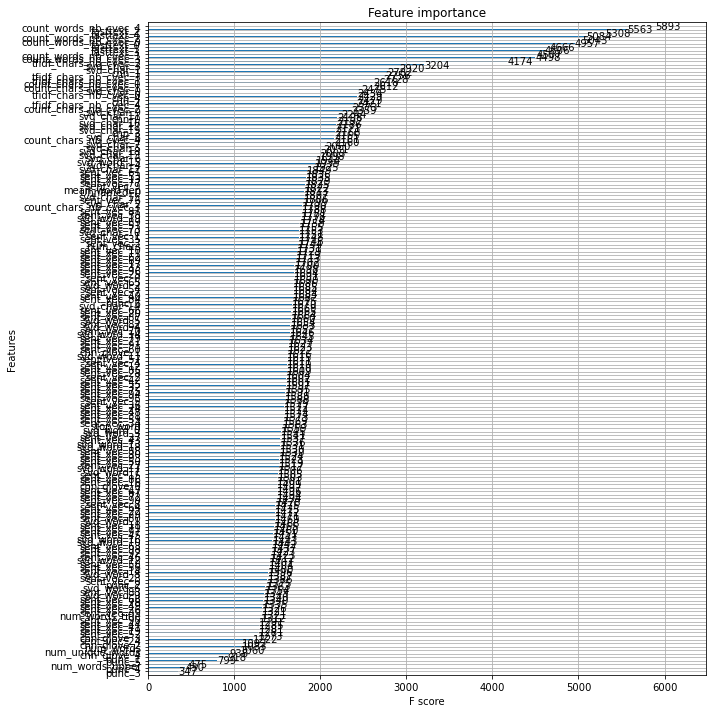

In [65]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)

In [64]:
result, model = XGB_result(X_train,X_test,Y_train)
test_index = X_test['index'].values
out_df = pd.DataFrame(result, columns = ['0', '1', '2', '3', '4'])
out_df.insert(0, 'index', test_index)
out_df.to_csv("Final_Submission.csv", index=False)

[02:11:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.59116	test-mlogloss:1.59112
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 100 rounds.
[20]	train-mlogloss:1.30177	test-mlogloss:1.30140
[40]	train-mlogloss:1.10034	test-mlogloss:1.10036
[60]	train-mlogloss:0.95207	test-mlogloss:0.95288
[80]	train-mlogloss:0.83779	test-mlogloss:0.83965
[100]	train-mlogloss:0.74770	test-mlogloss:0.75068
[120]	train-mlogloss:0.67669	test-mlogloss:0.68103
[140]	train-mlogloss:0.62011	test-mlogloss:0.62580
[160]	train-mlogloss:0.57435	test-mlogloss:0.58140
[180]	trai

In [57]:
def tfidfWords(trn,tst):
    #최대 3단어까지 묶어서 진행, 각 데이터셋과 둘을 합한 데이터셋에 대한 결과를 return
    tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    full_tfidf = tfidf_vec.fit_transform(trn['text'].values.tolist() + tst['text'].values.tolist())
    train_tfidf = tfidf_vec.transform(trn['text'].values.tolist())
    test_tfidf = tfidf_vec.transform(tst['text'].values.tolist())
    return train_tfidf,test_tfidf,full_tfidf

train_tfidf,test_tfidf,full_tfidf = tfidfWords(X_train,X_test)

n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))

train_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
X_train = pd.concat([X_train, train_svd], axis=1)
X_test= pd.concat([X_test, test_svd], axis=1)

In [58]:
def tfidfWords(trn,tst):
    #이번엔 character를 분석하여 최대 5단어까지 묶어서 진행, 각 데이터셋과 둘을 합한 데이터셋에 대한 결과를 return
    tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), analyzer = 'char')
    full_tfidf = tfidf_vec.fit_transform(trn['text'].values.tolist() + tst['text'].values.tolist())
    train_tfidf = tfidf_vec.transform(trn['text'].values.tolist())
    test_tfidf = tfidf_vec.transform(tst['text'].values.tolist())
    return train_tfidf,test_tfidf,full_tfidf

train_tfidf,test_tfidf,full_tfidf = tfidfWords(X_train,X_test)

n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))

train_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_char_'+str(i) for i in range(n_comp)]
X_train = pd.concat([X_train, train_svd], axis=1)
X_test= pd.concat([X_test, test_svd], axis=1)